In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
#Use pandas to import file
dataset = pd.read_csv('train.csv')

In [3]:
#Check the data
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Survived', ylabel='count'>

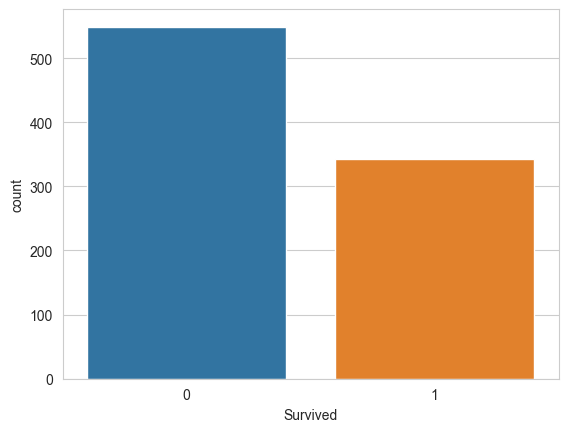

In [4]:
sns.set_style("whitegrid")
sns.countplot(dataset, x="Survived")

<Axes: xlabel='Survived', ylabel='count'>

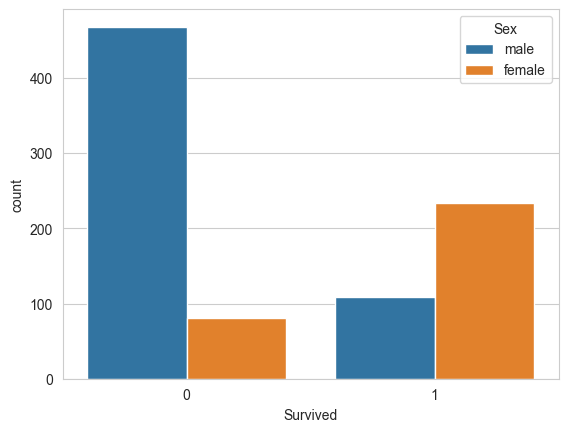

In [5]:
sns.countplot(dataset, x="Survived", hue="Sex")

<Axes: xlabel='Survived', ylabel='count'>

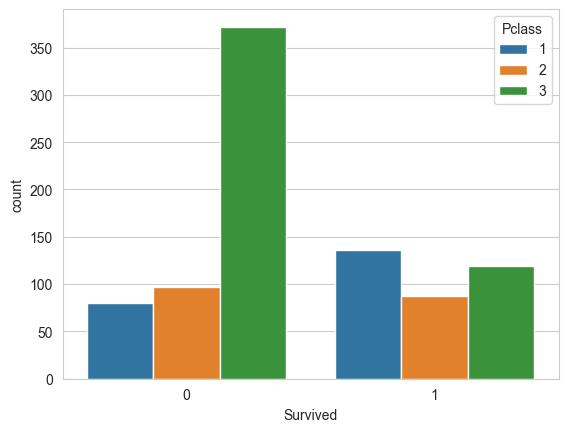

In [6]:
sns.countplot(dataset, x="Survived", hue="Pclass")

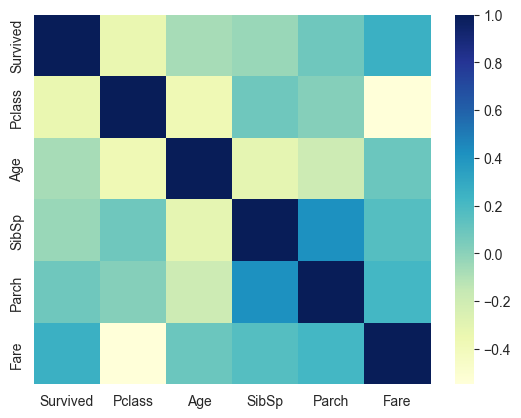

In [7]:
#Visualize the correlation within the dataset

numeric_columns = ["Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"]
numeric_data = dataset[numeric_columns]
sns.heatmap(numeric_data.corr(), cmap="YlGnBu")
plt.show()

In [8]:
#Shuffle the data
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices, test_indices in split.split(dataset, dataset[["Survived", "Pclass", "Sex"]]):
    strat_train_set = dataset.loc[train_indices]
    strat_test_set = dataset.loc[test_indices]

In [9]:
#Check if it worked to shuffle the table
strat_test_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
595,596,0,3,"Van Impe, Mr. Jean Baptiste",male,36.0,1,1,345773,24.1500,NaN,S
584,585,0,3,"Paulner, Mr. Uscher",male,NaN,0,0,3411,8.7125,NaN,C
161,162,1,2,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",female,40.0,0,0,C.A. 33595,15.7500,NaN,S
450,451,0,2,"West, Mr. Edwy Arthur",male,36.0,1,2,C.A. 34651,27.7500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


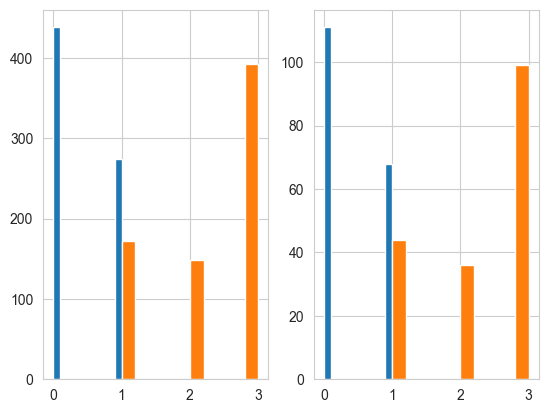

In [10]:
#Check to see how the distribution worked out
plt.subplot(1, 2, 1)
strat_train_set["Survived"].hist()
strat_train_set["Pclass"].hist()

plt.subplot(1, 2, 2)
strat_test_set["Survived"].hist()
strat_test_set["Pclass"].hist()
plt.show()

In [11]:
#use the info function to see if we have any missing data
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 387 to 194
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          574 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        166 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


<Axes: xlabel='Pclass', ylabel='Age'>

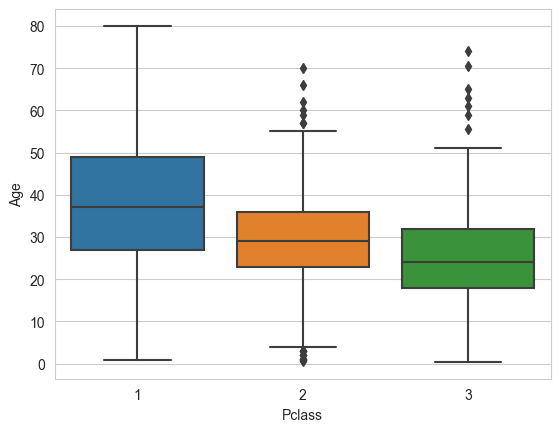

In [12]:
#Look at the distribution according to the relationship between age and class
#and use the mean for imputation, for a more meaningful replacement of NaN values

sns.boxplot(dataset, x="Pclass", y="Age")

In [13]:
#In the next 2 cells we will create a data pipeline, the first will impute age according to an average related
#to class. While the second part will encode the 2 object columns with One-hot encoding, I use one-hot if the categories
#have 3 or less categories, typically its used for Ordinal data. Then lastly the feature dropper will drop the features
#that are not needed, like the Cabin in this case since it had too many missing values

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

def age_imputer(cols):
    Age = cols[0]
    Pclass =cols[1]
    if math.isnan(Age):  # Use to find "NaN"
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 25
    else:
        return Age

In [14]:
#Check fill in the dataset
strat_train_set['Age'] = strat_train_set[['Age','Pclass']].apply(age_imputer, axis=1)
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 387 to 194
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        166 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [15]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self
    def transform(self, X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()
        
        column_names = ['C', 'S', 'Q', 'N']
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
            
        matrix = encoder.fit_transform(X[['Sex']]).toarray()
        
        column_names = ["Female", "Male"]
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
        return X

In [16]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X.drop(["Embarked", "Name", "Ticket", "Cabin", 'N', 'Sex'], axis=1, errors="ignore")

In [17]:
#Create a pipeline
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("featureencoder", FeatureEncoder()),
                    ("featuredropper", FeatureDropper())])

In [18]:
#Use the pipeline
strat_train_set = pipeline.fit_transform(strat_train_set)

In [19]:
#Once pipeline is complete then we check if the features are correct
strat_train_set.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
387,388,1,2,36.0,0,0,13.0000,0.0,0.0,1.0,1.0,0.0
50,51,0,3,7.0,4,1,39.6875,0.0,0.0,1.0,0.0,1.0
647,648,1,1,56.0,0,0,35.5000,1.0,0.0,0.0,0.0,1.0
432,433,1,2,42.0,1,0,26.0000,0.0,0.0,1.0,1.0,0.0
106,107,1,3,21.0,0,0,7.6500,0.0,0.0,1.0,1.0,0.0


<Axes: >

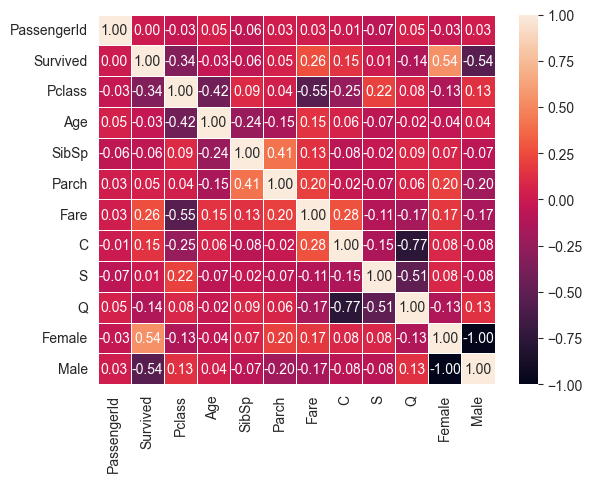

In [20]:
sns.heatmap(strat_train_set.corr(), annot=True, fmt=".2f", linewidths=0.5)

In [21]:
#Begin Model selection
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score

#split the features
X = strat_train_set.drop("Survived", axis=1)
y = strat_train_set["Survived"]

#split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#make the XGboost model
xg_model = xgb.XGBClassifier()

#Train the model using the training data
xg_model.fit(X_train, y_train)

#Evaluate the model on the validation data
y_val_prediction = xg_model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_prediction)
precision = precision_score(y_val, y_val_prediction)

print("Validation Accuracy:", accuracy)
print("Validation Precision:", precision)

Validation Accuracy: 0.8041958041958042
Validation Precision: 0.75


In [22]:
#Let's evaluate other metrics and which feature the model relied on the most for predictions

from sklearn.metrics import recall_score, f1_score

# Calculate precision
precision = precision_score(y_val, y_val_prediction)

# Calculate recall
recall = recall_score(y_val, y_val_prediction)

# Calculate F1-score
f1 = f1_score(y_val, y_val_prediction)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.75
Recall: 0.6923076923076923
F1-score: 0.7199999999999999


<Figure size 1000x600 with 0 Axes>

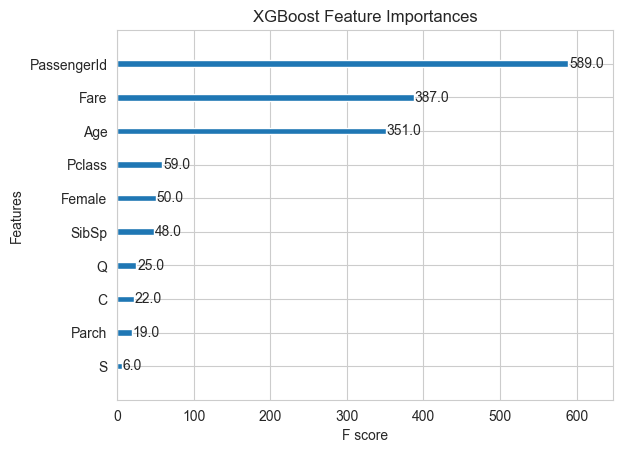

In [23]:
# Plot feature importances
plt.figure(figsize=(10, 6))
xgb.plot_importance(xg_model, importance_type='weight', max_num_features=10)  # Change max_num_features as needed
plt.title("XGBoost Feature Importances")
plt.show()

In [24]:
#Check the test data
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 595 to 591
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  179 non-null    int64  
 1   Survived     179 non-null    int64  
 2   Pclass       179 non-null    int64  
 3   Name         179 non-null    object 
 4   Sex          179 non-null    object 
 5   Age          140 non-null    float64
 6   SibSp        179 non-null    int64  
 7   Parch        179 non-null    int64  
 8   Ticket       179 non-null    object 
 9   Fare         179 non-null    float64
 10  Cabin        38 non-null     object 
 11  Embarked     179 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.2+ KB


In [25]:
#process the test data through our pipeline
strat_test_set = pipeline.transform(strat_test_set)

#Check the data
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 595 to 591
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  179 non-null    int64  
 1   Survived     179 non-null    int64  
 2   Pclass       179 non-null    int64  
 3   Age          140 non-null    float64
 4   SibSp        179 non-null    int64  
 5   Parch        179 non-null    int64  
 6   Fare         179 non-null    float64
 7   C            179 non-null    float64
 8   S            179 non-null    float64
 9   Q            179 non-null    float64
 10  Female       179 non-null    float64
 11  Male         179 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 18.2 KB


In [26]:
#drop the survived label
X_test = strat_test_set.drop("Survived", axis=1)
y_test = strat_test_set["Survived"]

#Evaluate the model
test_accuracy = xg_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.6927374301675978


In [27]:
#ALL IS GOOD NOW USE THE ENTIRE SET provided test.csv
final_dataset = pd.read_csv('test.csv')
# Preprocess the entire dataset using the pipeline
processed_dataset = pipeline.transform(final_dataset)

#Run it through the model XGboost
predictions_final = xg_model.predict(processed_dataset)

#create a dataframe to see if its all good
predictions_df = pd.DataFrame()
predictions_df['PassengerId'] = processed_dataset['PassengerId']
predictions_df['Survived'] = predictions_final

#display results
predictions_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [28]:
#Create CSV file for submission
#predictions_df.to_csv('predictions.csv', index=False)
#DONE!

In [29]:
"""In conclusion based on the training done, the results were satisfactory
and the model did not count the Male figure which is unusual since as seen in
the EDA there were more male deaths as compared to females"""

'In conclusion based on the training done, the results were satisfactory\nand the model did not count the Male figure which is unusual since as seen in\nthe EDA there were more male deaths as compared to females'